# EDA (Exploratory Data Analysis): 

This is a basic exploratory data analysis for categorical and numerical variables. In this case the dataset is splitted per any categorical variable to test dependences. It has been tested this dataset:
- **weather**: my dataset with numerical and categorical data without target.

In [32]:
%matplotlib inline
import os
import sys  
import numpy as np
import pandas as pd
import copy
import warnings
warnings.filterwarnings('ignore')

# import reader
sys.path.append('../../scripts/tools')  
from reader import csv2df as reader

### arguments

In [2]:
starget = ''
ddt ={'lcol':['datetime'],'sformat':"%Y-%m-%d %H:%M:%S"}

## DATA

### import scikit-learn datasets 

### read data: titanic dataset

### read weather (timeseries) dataset

In [77]:
## read data
path = os.path.join('../../datasets','dataset.weather.csv')
dfdata,dcol = reader(path,ddt=ddt)
dfdata = dfdata.set_index('datetime')
## collect temporal components
dfdata['year'] = [i.year for i in dfdata.index.tolist()]
dfdata['month'] = [i.month for i in dfdata.index.tolist()]
dfdata['day'] = [i.day for i in dfdata.index.tolist()]
dfdata['hour'] = [i.hour for i in dfdata.index.tolist()]
dfdata['dow'] = [int(i.strftime("%w")) for i in dfdata.index.tolist()]
dfdata['doy'] = [int(i.strftime("%j")) for i in dfdata.index.tolist()]
dcol['lc_cat'] = dcol['lc_cat'] + ['year','month','day','hour','dow','doy']

### data preparation

In [78]:
## object to categorical
for scol in dcol['lc_cat']:
    dfdata[scol] = dfdata[scol].astype('category')
## num int to categorical
#import copy
#dcol['lc_cat'] = copy.deepcopy(dcol['lc_int']) + ['DoY']
#dcol['lc_int'] = list()    

In [79]:
# available variables
print('Column names:')
print('- target(%s): %s'%(len(dcol['ly']),dcol['ly']))
print('- features(%s): %s'%(len(dcol['lx']),dcol['lx']))
print('- float(%s): %s'%(len(dcol['lc_float']),dcol['lc_float']))
print('- int(%s): %s'%(len(dcol['lc_int']),dcol['lc_int']))
print('- cat(%s): %s'%(len(dcol['lc_cat']),dcol['lc_cat']))

Column names:
- target(0): []
- features(14): ['datetime', 'RH (%)', 'WD', 'WS (m/s)', 'cloud_coverage', 'dew_point (degC)', 'irradiation (MJ/m2)', 'local_press (hPa)', 'precipitation (mm)', 'sea-level pressure (hPa)', 'sunlight_duration (h)', 'temperature (degC)', 'vapor_press (hPa)', 'visibility (km)']
- float(11): ['RH (%)', 'WS (m/s)', 'dew_point (degC)', 'irradiation (MJ/m2)', 'local_press (hPa)', 'precipitation (mm)', 'sea-level pressure (hPa)', 'sunlight_duration (h)', 'temperature (degC)', 'vapor_press (hPa)', 'visibility (km)']
- int(0): []
- cat(8): ['WD', 'cloud_coverage', 'year', 'month', 'day', 'hour', 'dow', 'doy']


## CORRELATION

In [94]:
## correlation of 'lcol_num' list of variables vs 'snum_target' per 'scat_ref'
def corr_per_cat(dfdata:'df', lcol_num:list, snum_target:str, scat_ref:str):
    """
    Correlation of 'lcol_num' list of variables vs 'snum_target' per 'scat_ref'.
    dfdata -- data.
    lcol_num -- list of numerical variable names.
    snum_target -- name of numerical variable to be used as target.
    scat_ref -- name of categorical variable to be used as reference to split the dataset.
    """
    from IPython.display import display, HTML
    # header
    display(HTML('<h2>CORRELATION (per "%s"):</h2>'%scat_ref))
    display(HTML('<h3>%s VS [%s]</h3>'%(lcol_num, snum_target)))
    # select data
    df = dfdata[lcol_num + [snum_target, scat_ref]]
    # correlation per 
    lcat_ref = sorted(df[scat_ref].unique())
    for ii, iref in enumerate(lcat_ref):
        idfcorr = df[df[scat_ref]==iref].corr(method='pearson',min_periods=50)[lcol_num].iloc[[df.corr().index.tolist().index(snum_target)]].reset_index(drop=True)
        if ii == 0: dfcorr = copy.deepcopy(idfcorr)
        else: dfcorr = dfcorr.append(idfcorr)
        del(idfcorr)
    dfcorr[scat_ref] = lcat_ref
    dfcorr = dfcorr.set_index(scat_ref)
    # plot
    import matplotlib.pyplot as plt
    dfcorr.plot(subplots=True,figsize=(10,2*len(lcol_num)),title='corr per "%s"'%scat_ref,xticks=lcat_ref)
    plt.show()
    # append corr of whole data
    idfcorr_total = df.corr(method='pearson',min_periods=50)[lcol_num].iloc[[df.corr().index.tolist().index(snum_target)]].reset_index(drop=True)
    idfcorr_total[scat_ref] = ['total']
    idfcorr_total = idfcorr_total.set_index(scat_ref)
    dfcorr = dfcorr.append(idfcorr_total)
    # display the table
    print(dfcorr)

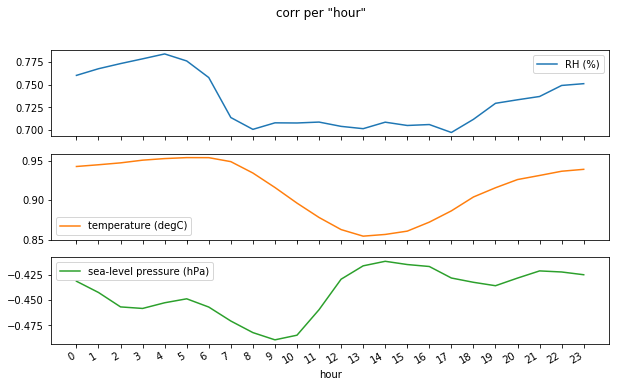

         RH (%)  temperature (degC)  sea-level pressure (hPa)
hour                                                         
0      0.760118            0.942431                 -0.431303
1      0.767472            0.944621                 -0.442490
2      0.773165            0.947012                 -0.456815
3      0.778419            0.950422                 -0.458344
4      0.783834            0.952441                 -0.452706
5      0.776058            0.953655                 -0.448767
6      0.757703            0.953592                 -0.456963
7      0.713496            0.948565                 -0.470844
8      0.700421            0.934174                 -0.482342
9      0.707639            0.915872                 -0.489542
10     0.707477            0.896131                 -0.484931
11     0.708485            0.877964                 -0.459577
12     0.703735            0.862659                 -0.429282
13     0.701180            0.854343                 -0.416004
14     0

In [98]:
lcol_num = ['RH (%)','temperature (degC)','sea-level pressure (hPa)']
snum_target = 'dew_point (degC)'
scat_ref = 'hour'
corr_per_cat(dfdata, lcol_num, snum_target, scat_ref)

## HEATMAP OF STATS:

In [140]:
## heatmap of statistics of variable 'snum_target' mapping according to 'scat1' and 'scat2'
def heatmap_stats(dfdata:'df',scat1:str, scat2:str, snum_target:str, dopererators:dict,figsize:tuple=(10, 10)):
    """
    Heatmap of statistics of variable 'snum_target' mapping according to 'scat1' and 'scat2'.
    dfdata -- data.
    scat1 -- name of a categorical variable to map the target variable in y axis.
    scat2 -- name of a categorical variable to map the target variable in x axis.    
    snum_target -- target variable on that it will be calculated the statistics.
    dopererators -- operators list of statistics to be calculated with their names as indexes.
    figsize -- tuple of dimensions to be used on each heatmap (y dim, x dim) (default (10, 10)). 
    """
    from IPython.display import display, HTML
    # header
    display(HTML('<h2>HEATMAP of "%s": map = ["%s" vs "%s"]</h2>'%(snum_target, scat1, scat2)))
    # select data
    df = dfdata[[scat1, scat2, snum_target]]
    # loop of operators
    for isoper, ioper in dopererators.items():
        display(HTML('<h3>Operator: %s</h3>'%(isoper)))
        # calculate pivot table
        dfpivot = pd.pivot_table(df, values=snum_target, index=scat1, columns=scat2, aggfunc=ioper)
        # heatmap
        import matplotlib.pyplot as plt
        import seaborn as sns
        sns.set()
        f, ax = plt.subplots(figsize=figsize)
        sns.heatmap(dfpivot, annot=True, fmt=".2f", linewidths=.5, ax=ax, cmap='jet')
        plt.show()

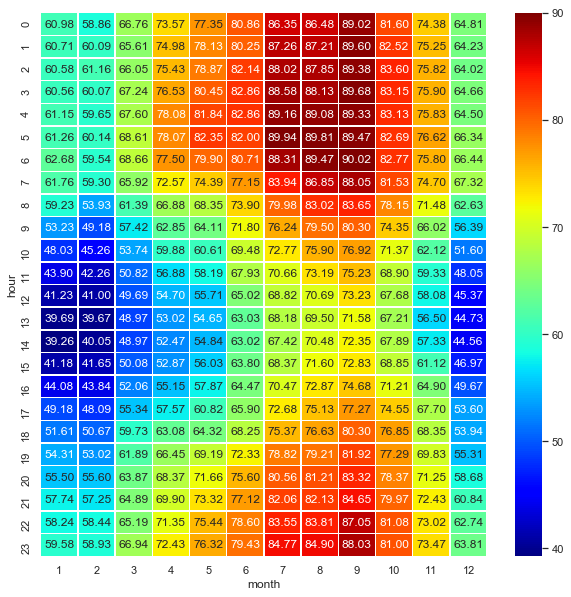

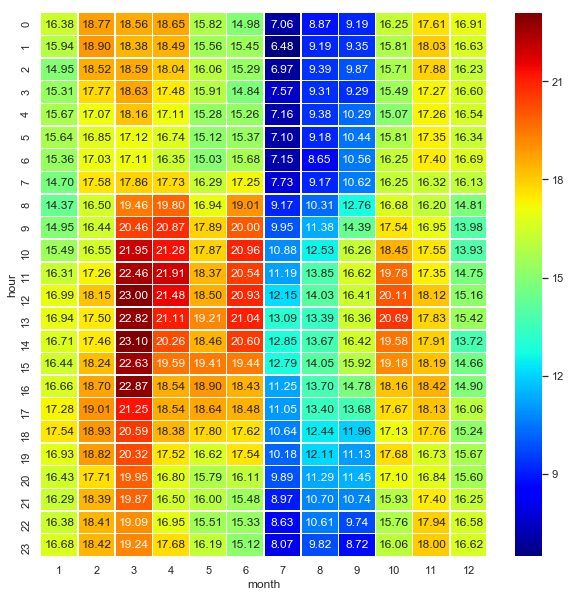

In [141]:
scat1 = "hour"
scat2 = "month"
snum_target = 'RH (%)'
dopererators = {'MEAN':'mean', 'STD':'std'}
heatmap_stats(dfdata,scat1, scat2, snum_target, dopererators)